Урок 6. Градиентный бустинг (AdaBoost)

Домашняя работа

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
from sklearn.datasets import load_diabetes
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [3]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [4]:
def bias(y, z):
    return (y - z)

In [5]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [6]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [7]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [8]:
X, y = load_diabetes(return_X_y=True)

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [10]:
n_trees = 10
coefs = [1] * n_trees
max_depth = 3
eta = 1
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [11]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 939.4495117293523
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5823.084493418649


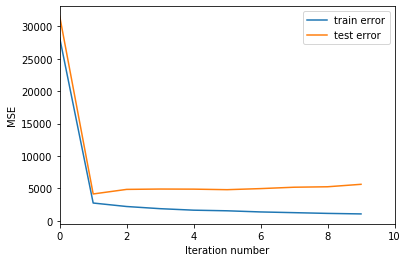

In [12]:
get_error_plot(n_trees, train_errors, test_errors)

Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

Перепишем функцию evaluate_alg таким образом, чтобы возвращались значения ошибок

In [13]:
def evaluate_alg_mod(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    error_train = mean_squared_error(y_train, train_prediction)
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    error_test = mean_squared_error(y_test, test_prediction)
    return error_train, error_test

In [14]:
def get_error_plot_mod(n, errs, labels, x_label, y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(0, n)
    for i in range(len(errs)):
        plt.plot(list(range(n)), errs[i], label=labels[i])
    plt.legend(loc='upper right')
    plt.show()

В цикле построим графики для разного количества деревьев и для разной максимальной глубины.

Посчитаем для eta = 1

Тренировочные данные


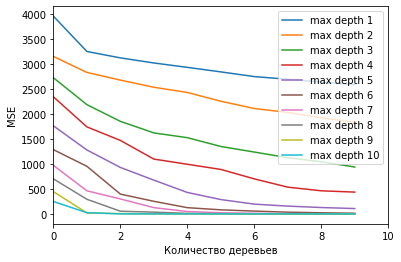

Тестовые данные


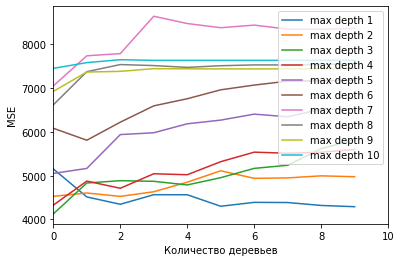

In [15]:
eta = 1
errs_train = []
errs_test = []
labels = []

for max in range(1, 11):
    labels.append(f'max depth {max}')
    errors_train = []
    errors_test = []
    for n in range(1, 11):
        coefs = [1] * n
        trees, train_errors, test_errors = gb_fit(n, max, X_train, X_test, y_train, y_test, coefs, eta)
        error_train, error_test = evaluate_alg_mod(X_train, X_test, y_train, y_test, trees, coefs, eta)
        errors_train.append(error_train)
        errors_test.append(error_test)
    errs_train.append(errors_train)
    errs_test.append(errors_test)

print('Тренировочные данные')
get_error_plot_mod(n, errs_train, labels, 'Количество деревьев', 'MSE')
print('Тестовые данные')
get_error_plot_mod(n, errs_test, labels, 'Количество деревьев', 'MSE')

Зависимость ошибки от количества деревьев для "eta" = 1 и "max depth" = 1

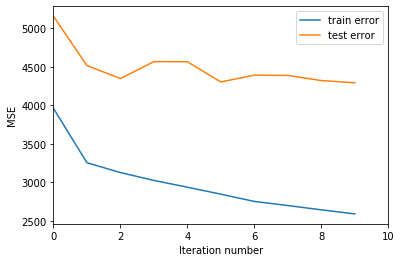

In [16]:
get_error_plot(10, errs_train[0], errs_test[0])

Зависимость ошибки от количества деревьев для "eta" = 1 и "max depth" = 2

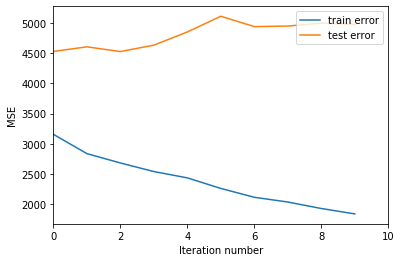

In [17]:
get_error_plot(10, errs_train[1], errs_test[1])

Зависимость ошибки от количества деревьев для "eta" = 1 и "max depth" = 3

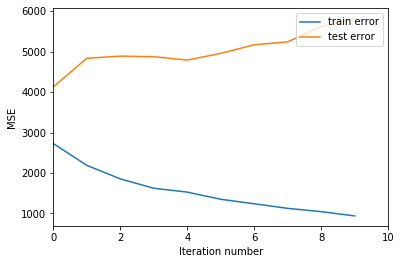

In [18]:
get_error_plot(10, errs_train[2], errs_test[2])

Зависимость ошибки от количества деревьев для "eta" = 1 и "max depth" = 4

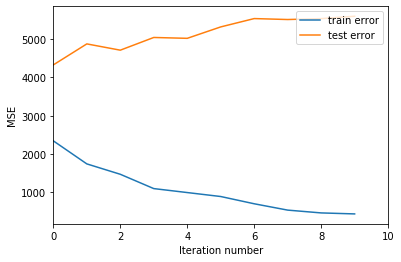

In [19]:
get_error_plot(10, errs_train[3], errs_test[3])

Зависимость ошибки от количества деревьев для "eta" = 1 и "max depth" = 5

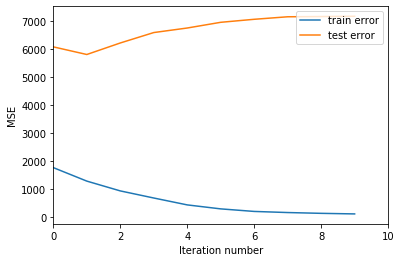

In [20]:
get_error_plot(10, errs_train[4], errs_test[5])

Зависимость ошибки от количества деревьев для "eta" = 1 и "max depth" = 6

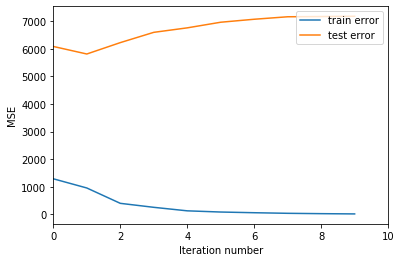

In [21]:
get_error_plot(10, errs_train[5], errs_test[5])

Зависимость ошибки от количества деревьев для "eta" = 1 и "max depth" = 7

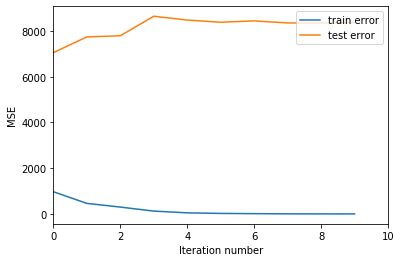

In [22]:
get_error_plot(10, errs_train[6], errs_test[6])

Зависимость ошибки от количества деревьев для "eta" = 1 и "max depth" = 8

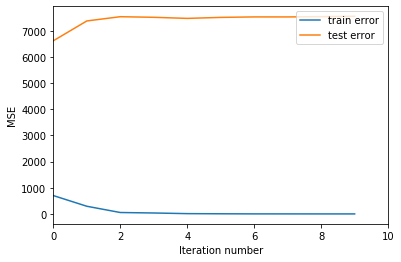

In [23]:
get_error_plot(10, errs_train[7], errs_test[7])

Зависимость ошибки от количества деревьев для "eta" = 1 и "max depth" = 9

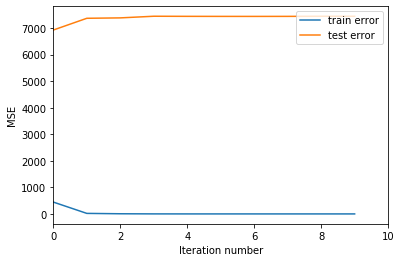

In [24]:
get_error_plot(10, errs_train[8], errs_test[8])

Зависимость ошибки от количества деревьев для "eta" = 1 и "max depth" = 10

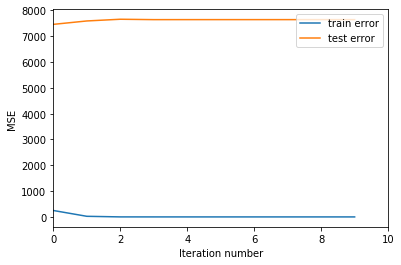

In [25]:
get_error_plot(10, errs_train[9], errs_test[9])

Вывод: с увеличением глубины ошибка уменьшается, но при этом усиливается переобучение.

Посчитаем для eta = 0.1

Тренировочные данные


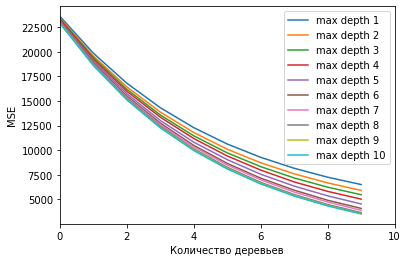

Тестовые данные


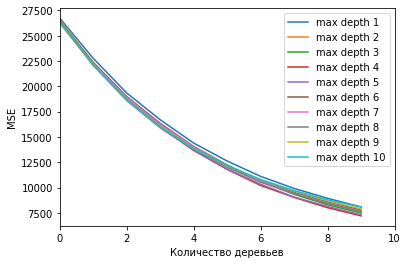

In [26]:
eta = 0.1
errs_train = []
errs_test = []
labels = []

for max in range(1, 11):
    labels.append(f'max depth {max}')
    errors_train = []
    errors_test = []
    for n in range(1, 11):
        coefs = [1] * n
        trees, train_errors, test_errors = gb_fit(n, max, X_train, X_test, y_train, y_test, coefs, eta)
        error_train, error_test = evaluate_alg_mod(X_train, X_test, y_train, y_test, trees, coefs, eta)
        errors_train.append(error_train)
        errors_test.append(error_test)
    errs_train.append(errors_train)
    errs_test.append(errors_test)

print('Тренировочные данные')
get_error_plot_mod(n, errs_train, labels, 'Количество деревьев', 'MSE')
print('Тестовые данные')
get_error_plot_mod(n, errs_test, labels, 'Количество деревьев', 'MSE')

Зависимость ошибки от количества деревьев для "eta" = 0.1 и "max depth" = 1

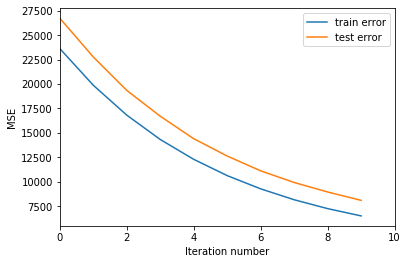

In [27]:
get_error_plot(10, errs_train[0], errs_test[0])

Зависимость ошибки от количества деревьев для "eta" = 0.1 и "max depth" = 2

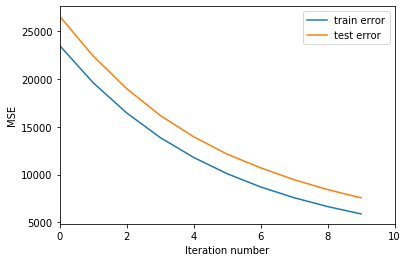

In [28]:
get_error_plot(10, errs_train[1], errs_test[1])

Зависимость ошибки от количества деревьев для "eta" = 0.1 и "max depth" = 3

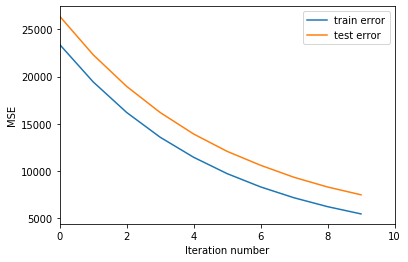

In [29]:
get_error_plot(10, errs_train[2], errs_test[2])

Зависимость ошибки от количества деревьев для "eta" = 0.1 и "max depth" = 4

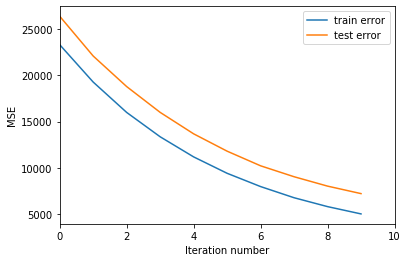

In [30]:
get_error_plot(10, errs_train[3], errs_test[3])

Зависимость ошибки от количества деревьев для "eta" = 0.1 и "max depth" = 5

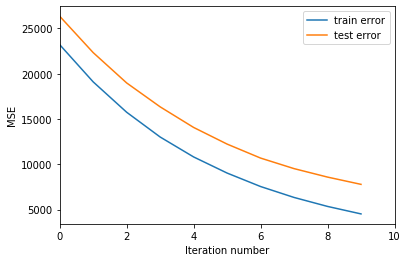

In [31]:
get_error_plot(10, errs_train[4], errs_test[5])

Зависимость ошибки от количества деревьев для "eta" = 0.1 и "max depth" = 6

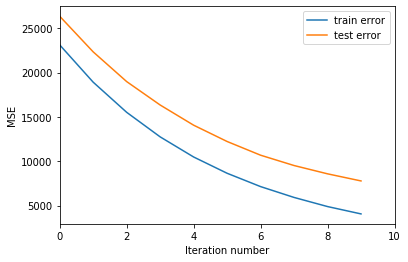

In [32]:
get_error_plot(10, errs_train[5], errs_test[5])

Зависимость ошибки от количества деревьев для "eta" = 0.1 и "max depth" = 7

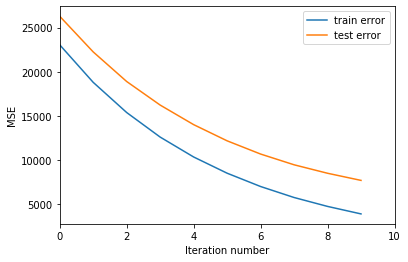

In [33]:
get_error_plot(10, errs_train[6], errs_test[6])

Зависимость ошибки от количества деревьев для "eta" = 0.1 и "max depth" = 8

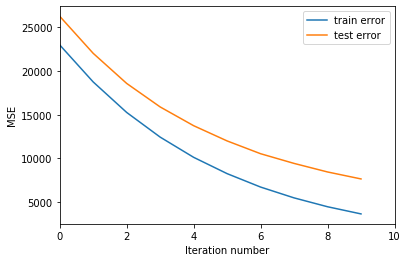

In [34]:
get_error_plot(10, errs_train[7], errs_test[7])

Зависимость ошибки от количества деревьев для "eta" = 0.1 и "max depth" = 9

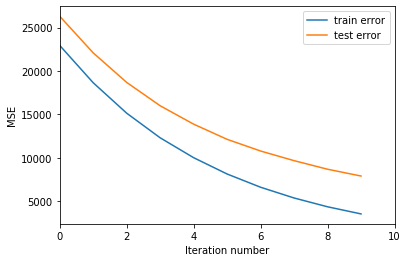

In [35]:
get_error_plot(10, errs_train[8], errs_test[8])

Зависимость ошибки от количества деревьев для "eta" = 0.1 и "max depth" = 10

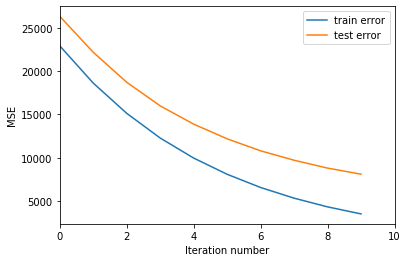

In [36]:
get_error_plot(10, errs_train[9], errs_test[9])

Вывод: с увеличением глубины ошибка уменьшается, но при этом усиливается переобучение.

Посчитаем для eta = 0.01

Тренировочные данные


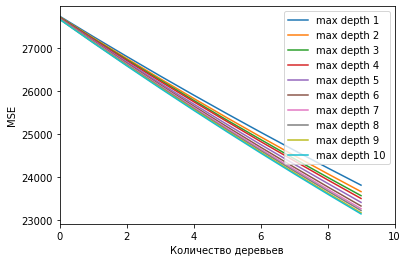

Тестовые данные


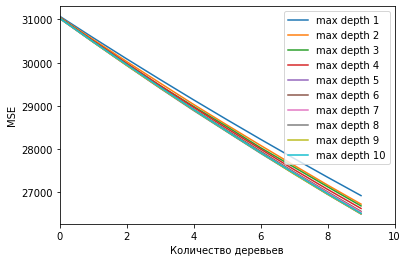

In [37]:
eta = 0.01
errs_train = []
errs_test = []
labels = []

for max in range(1, 11):
    labels.append(f'max depth {max}')
    errors_train = []
    errors_test = []
    for n in range(1, 11):
        coefs = [1] * n
        trees, train_errors, test_errors = gb_fit(n, max, X_train, X_test, y_train, y_test, coefs, eta)
        error_train, error_test = evaluate_alg_mod(X_train, X_test, y_train, y_test, trees, coefs, eta)
        errors_train.append(error_train)
        errors_test.append(error_test)
    errs_train.append(errors_train)
    errs_test.append(errors_test)

print('Тренировочные данные')
get_error_plot_mod(n, errs_train, labels, 'Количество деревьев', 'MSE')
print('Тестовые данные')
get_error_plot_mod(n, errs_test, labels, 'Количество деревьев', 'MSE')

Зависимость ошибки от количества деревьев для "eta" = 0.01 и "max depth" = 1

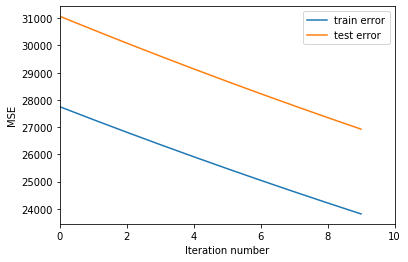

In [38]:
get_error_plot(10, errs_train[0], errs_test[0])

Зависимость ошибки от количества деревьев для "eta" = 0.01 и "max depth" = 2

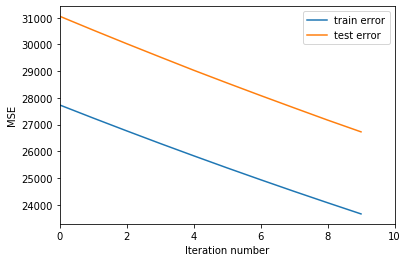

In [39]:
get_error_plot(10, errs_train[1], errs_test[1])

Зависимость ошибки от количества деревьев для "eta" = 0.01 и "max depth" = 3

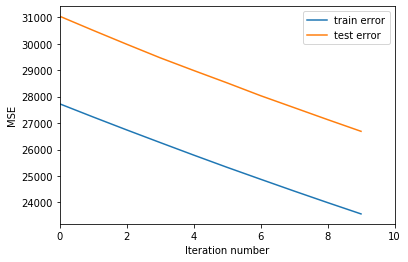

In [40]:
get_error_plot(10, errs_train[2], errs_test[2])

Зависимость ошибки от количества деревьев для "eta" = 0.01 и "max depth" = 4

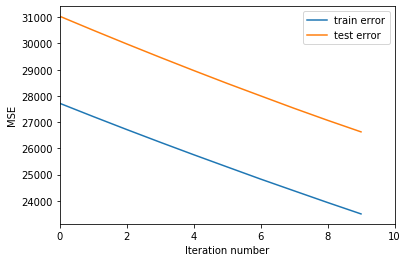

In [41]:
get_error_plot(10, errs_train[3], errs_test[3])

Зависимость ошибки от количества деревьев для "eta" = 0.01 и "max depth" = 5

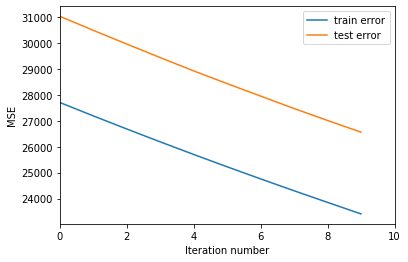

In [42]:
get_error_plot(10, errs_train[4], errs_test[5])

Зависимость ошибки от количества деревьев для "eta" = 0.01 и "max depth" = 6

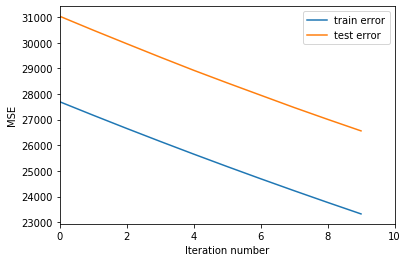

In [43]:
get_error_plot(10, errs_train[5], errs_test[5])

Зависимость ошибки от количества деревьев для "eta" = 0.01 и "max depth" = 7

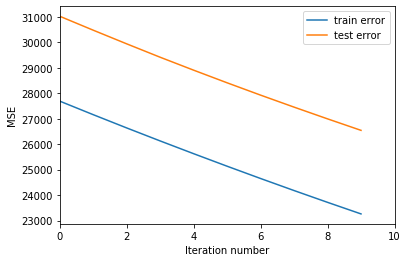

In [44]:
get_error_plot(10, errs_train[6], errs_test[6])

Зависимость ошибки от количества деревьев для "eta" = 0.01 и "max depth" = 8

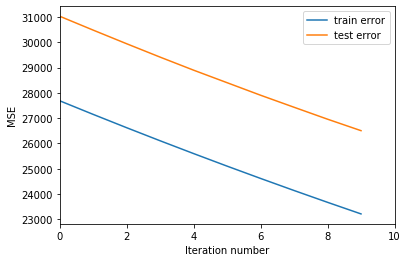

In [45]:
get_error_plot(10, errs_train[7], errs_test[7])

Зависимость ошибки от количества деревьев для "eta" = 0.01 и "max depth" = 9

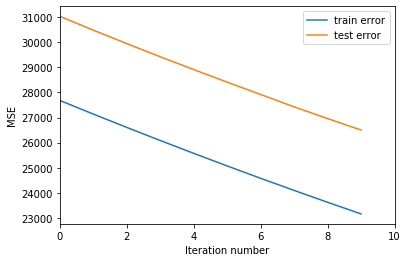

In [46]:
get_error_plot(10, errs_train[8], errs_test[8])

Зависимость ошибки от количества деревьев для "eta" = 0.01 и "max depth" = 10

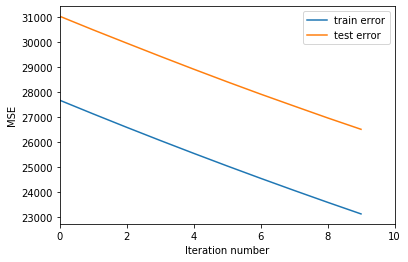

In [47]:
get_error_plot(10, errs_train[9], errs_test[9])

Вывод: с увеличением глубины ошибка уменьшается, но при этом усиливается переобучение.

С увеличением глубины и количества деревьев ошибка уменьшается, но усиливается переобучение. При уменьшении eta ошибка большая при малом количестве деревьев и малой глубине дерева и монотонно убывает при большом количестве деревьев и большой глубине деревьев.